In [1]:
import os
import numpy as np
import cv2, pydicom
import matplotlib.pyplot as plt

In [28]:
class Dicom():
    def __init__(self, dicom_path=None, window_center=None, window_width=None):
        self.dicom_path = dicom_path
        self.window_center = window_center
        self.window_width = window_width
        
        self.hu_img = self.dicom_to_array(self.dicom_path)
        self.img = self.dicom_windowing(self.hu_img, self.window_center, self.window_width)

    def dicom_to_array(self, dicom_path):
        self.slice = pydicom.read_file(dicom_path)
        s = int(self.slice.RescaleSlope)
        b = int(self.slice.RescaleIntercept)
        return s * self.slice.pixel_array + b

    def dicom_windowing(self, image, window_center, window_width):
        img_min = window_center - window_width / 2
        img_max = window_center + window_width / 2
        window_img = np.clip(image, img_min, img_max)
        return window_img
    
    def get_image(self):
        return self.img
    
    def get_hu_image(self):
        return self.hu_img
    
    def change_window(self, window_center, window_width):
        self.window_center = window_center
        self.window_width = window_width
        self.img = self.dicom_windowing(self.hu_img, self.window_center, self.window_width)

In [29]:
data_list = os.listdir('data/Sample1')
dicom_path = os.path.join('data/Sample1',data_list[0])
dicom_file = Dicom(dicom_path=dicom_path, window_center=600, window_width=1000)
image = dicom_file.get_image()
hu_img = dicom_file.get_hu_image()

Text(0.5, 1.0, 'Window Center : 600, Window Width : 1000')

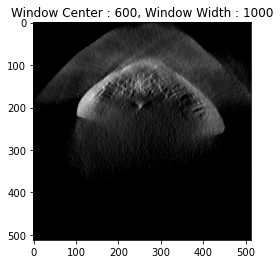

In [30]:
plt.imshow(image, cmap="gray")
plt.title(f"Window Center : {dicom_file.window_center}, Window Width : {dicom_file.window_width}")

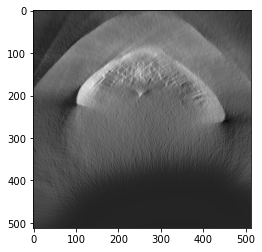

In [31]:
plt.imshow(hu_img, cmap='gray')

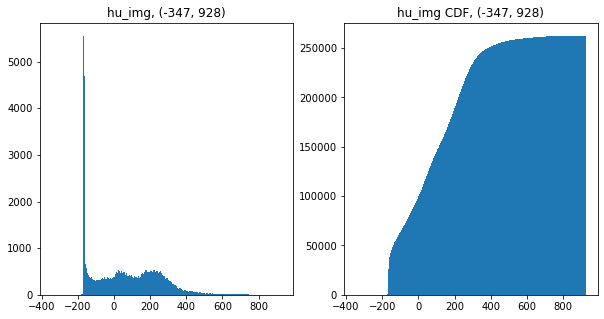

In [32]:
hist1, bins1 = np.histogram(hu_img.flatten(), int(np.max(hu_img) - np.min(hu_img) + 1), [np.min(hu_img), np.max(hu_img)])
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist(hu_img.flatten(), bins1)
plt.title(f"hu_img, {np.min(hu_img), np.max(hu_img)}")
plt.subplot(1, 2, 2)
plt.hist(hu_img.flatten(), bins1, cumulative=True)
plt.title(f"hu_img CDF, {np.min(hu_img), np.max(hu_img)}")
plt.show()

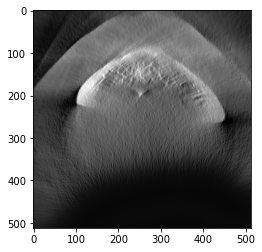

In [34]:
dicom_file.change_window(300, 1000)
plt.imshow(dicom_file.img, cmap="gray")